In [1]:
import pandas as pd
import numpy as np

from math import log
import scipy as sp

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

#from sklearn import preprocessing
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#from sklearn.cross_validation import train_test_split

import statsmodels.formula.api as smf
import seaborn as sns

import warnings

#warnings.filterwarnings(action='once')
warnings.filterwarnings(action='default')

In [2]:
#load Data
dataMain = pd.read_csv("https://raw.githubusercontent.com/sqlshep/SQLShepBlog/master/data/USA.dataAll.csv")

#Remove infinites and NAs 
dataMain = dataMain.replace([np.inf, -np.inf], np.nan)
dataMain = dataMain.fillna(0)

#Rename Column
dataMain=dataMain.rename(columns = {'Unnamed: 0':'X'})

#remove extra NY County 
dataMain = dataMain[dataMain.X != 1864]

#Shape of the data
dataMain.shape

(3151, 54)

In [3]:
#review top 5 rows
dataMain.head()

,X,state_abbr,county_name,RuralUrbanCode,Winner,Population,Poverty,PovertyPercent,EDU_LessHSDiploma,EDU_HSDiploma,...,lg_GINI_Coeff,lg_HHMedianIncome,lg_HHMeanIncome,lg_PerCapitaPI,lg_Diabetes,lg_Inactivity,lg_Obesity,lg_Uninsured,lg_OpioidRx,combined_fips
0,1,AL,Autauga County,2,1,54860.0,6966.0,12.7,12.8,33.5,...,3.732896,10.845076,11.078521,10.539350,2.564949,3.353407,3.529297,2.079442,2.274186,1001
1,2,AL,Baldwin County,3,1,201006.0,25941.0,12.9,10.5,28.8,...,3.793239,10.824845,11.129745,10.599655,2.341806,3.104587,3.310543,2.079442,2.202765,1003
2,3,AL,Barbour County,6,1,23066.0,7380.0,32.0,26.7,34.5,...,3.850148,10.403171,10.707460,10.355932,2.912351,3.459466,3.793239,2.708050,1.747459,1005
3,4,AL,Bibb County,1,1,20326.0,4516.0,22.2,19.3,42.1,...,3.790985,10.563026,10.863623,10.277634,2.694627,3.523415,3.696351,2.302585,1.553925,1007
4,5,AL,Blount County,1,1,57116.0,8399.0,14.7,21.5,33.4,...,3.691376,10.732323,10.912977,10.362904,2.646175,3.332205,3.543854,2.302585,1.818077,1009


In [4]:
# Statistics on the data
dataMain.describe()

,X,RuralUrbanCode,Winner,Population,Poverty,PovertyPercent,EDU_LessHSDiploma,EDU_HSDiploma,EDU_SomeCollegeorAS,EDU_BSorHigher,...,lg_GINI_Coeff,lg_HHMedianIncome,lg_HHMeanIncome,lg_PerCapitaPI,lg_Diabetes,lg_Inactivity,lg_Obesity,lg_Uninsured,lg_OpioidRx,combined_fips
count,3151.000000,3151.000000,3151.000000,3.151000e+03,3.151000e+03,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,...,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000
mean,1576.408759,5.012694,0.845129,9.998227e+04,1.472069e+04,16.248017,14.550619,34.728816,30.252777,20.403713,...,-38.653004,10.713118,10.989868,10.135949,2.393439,3.234573,3.422926,2.234758,1.674152,30391.090447
std,910.178372,2.709272,0.361840,3.235648e+05,5.207640e+04,6.447471,6.647523,7.126732,5.226419,9.026466,...,50.614814,0.412284,0.353763,2.132959,0.229513,0.213202,0.155290,0.507939,0.440874,15163.730831
min,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-99.000000,0.000000,0.000000,0.000000,1.193922,2.091864,2.468100,0.693147,-0.820981,1001.000000
25%,788.500000,2.000000,1.000000,1.059050e+04,1.696500e+03,11.500000,9.500000,30.300000,26.700000,14.150000,...,-99.000000,10.565338,10.849502,10.396735,2.251292,3.117950,3.342862,1.945910,1.510722,18178.000000
50%,1576.000000,6.000000,1.000000,2.483900e+04,4.106000e+03,15.200000,13.100000,35.100000,30.300000,18.200000,...,3.708682,10.716881,10.980672,10.539350,2.406945,3.250374,3.440418,2.197225,1.735189,29179.000000
75%,2364.500000,7.000000,1.000000,6.518250e+04,1.007100e+04,19.700000,18.700000,39.600000,33.800000,24.200000,...,3.797734,10.863766,11.114885,10.702964,2.557227,3.380995,3.520461,2.639057,1.925707,45082.000000
max,3152.000000,9.000000,1.000000,1.001160e+07,1.675802e+06,47.400000,53.700000,54.800000,47.800000,78.800000,...,4.094345,11.723616,12.012755,12.180042,3.157000,3.723281,3.862833,3.688879,3.934958,56045.000000


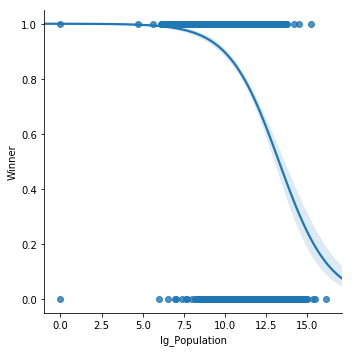

In [5]:
# log plot of Winner against populaiton
# as the population of a count increases 
# the less likely they are to vte for Trump
sns.lmplot('lg_Population','Winner', data=dataMain, logistic=True)


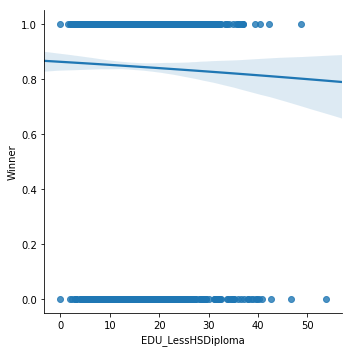

In [6]:
# Nothing really to see here. 
sns.lmplot('EDU_LessHSDiploma','Winner', data=dataMain, logistic=True)

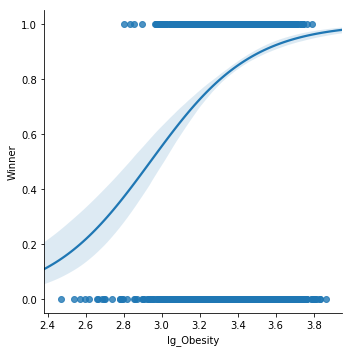

In [7]:
# As the obesity rate for a county increases
# the more likely the county is to vote for Trump 
sns.lmplot('lg_Obesity','Winner', data=dataMain, logistic=True)

In [8]:
#elect_lg.glm <- glm(Winner ~ lg_Population + lg_PovertyPercent + lg_EDU_HSDiploma + 
#      lg_EDU_SomeCollegeorAS + lg_EDU_BSorHigher + lg_UnemploymentRate + 
#      lg_Married + lg_HHMeanIncome + lg_Diabetes + lg_Inactivity + 
#      lg_OpioidRx, family = binomial, data = data.Main)

results = smf.logit('Winner ~ lg_Population \
                    + lg_PovertyPercent \
                    + lg_EDU_HSDiploma \
                    + lg_EDU_SomeCollegeorAS \
                    + lg_EDU_BSorHigher \
                    + lg_UnemploymentRate \
                    + lg_Married \
                    + lg_HHMeanIncome \
                    + lg_Diabetes \
                    + lg_Inactivity \
                    + lg_OpioidRx', data=dataMain).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.202291
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Winner   No. Observations:                 3151
Model:                          Logit   Df Residuals:                     3139
Method:                           MLE   Df Model:                           11
Date:                Fri, 24 Aug 2018   Pseudo R-squ.:                  0.5307
Time:                        14:12:07   Log-Likelihood:                -637.42
converged:                       True   LL-Null:                       -1358.3
                                        LLR p-value:                1.185e-302
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -17.0767      2.628     -6.498      0.000     -22.228     -11.926
lg_Population             -0.2542      0.063     -4.061      0.000      -0.377      -0.132
lg_PovertyPercent         -1.7349      0.258     -6.715      0.000      -2.241      -1.229
lg_EDU_HSDiploma           2.0626      0.476      4.334      0.000       1.130       2.995
lg_EDU_SomeCollegeorAS     2.9948      0.453      6.615      0.000       2.107       3.882
lg_EDU_BSorHigher         -1.1135      0.335     -3.320      0.001      -1.771      -0.456
lg_UnemploymentRate       -1.5169      0.298     -5.097      0.000      -2.100      -0.934
lg_Married                 9.9277      0.735     13.507      0.000       8.487      11.368
lg_HHMeanIncome           -3.4160      0.377     -9.060      0.000      -4.155      -2.677
lg_Diabetes               -2.7026      0.510     -5.296      0.000      -3.703      -1.702
lg_Inactivity              6.1692      0.661      9.326      0.000       4.873       7.466
lg_OpioidRx                0.6079      0.196      3.107      0.002       0.224       0.991
==========================================================================================
"""

In [17]:
predictions = np.where(results.predict(dataMain) > .5, 1, 0)

/Users/Shep/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:775: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  exog = dmatrix(self.model.data.design_info.builder,


In [18]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
confusion_matrix(dataMain['Winner'], predictions)

array([[ 309,  179],
       [  74, 2589]])

In [20]:
(309+2589)/3151

0.9197080291970803